<img src="https://www.anped.org.br/sites/default/files/images/ufcg-lateral.png" width="780" height="240" align="center"/>

## Centro de Engenharia Elétrica e Informática
## Departamento de Engenharia Elétrica
## Disciplina: Int. ao Processamento de Imagem Digital e Visão Computacional
## Professora: Luciana Veloso
## Aluno(a): WILLIAM HENRIQUE A. MARTINS

# Experimento 04: Morfologia Matemática

In [4]:
import os                            # Operational System para manipulação de arquivos.
import cv2                           # OpenCV para manipulação de imagens.
import numpy as np                   # Numpy para manipulação de matrizes e arrays.
import matplotlib.pyplot as plt      # Pyplot para plotagem de gráficos e imagens.
import skimage.morphology            # Scikit-Image para produzir elementos estruturantes

O Scikit-Image pode ser instalado com: **conda install scikit-image**

## 1. Operações Lógicas em Imagens Binárias

É possível submeter imagens a operações lógicas de modo a obter novas imagens. Nesse contexto, a biblioteca OpenCV disponibiliza um conjunto de funções para implementação dessas operações:

1. AND: C = A $\cap$ B   
    * **C = cv2.bitwise_and( A, B )**
2. OR: $C = A \cup B$   
    * **C = cv2.bitwise_or( A, B )**
3. XOR: $C = A \oplus B$   
    * **C = cv2.bitwise_xor( A, B )**
4. Not: $C = \overline{A}$   
    * **C = ~A**
5. Diferença: C = A - B    
    *  $C = A \cap \overline{B} $
    
    
**Obs:** a função **cv2.threshold( src_img, limiar, vmax, cv2.THRESH_BINARY)** pode ser utilizada para binarizar imagens de tipo **uint**, sendo necessário informar o limiar de binarização e o valor do nível alto. A função retorna o limiar utilizado e a imagem binarizada, com pixels de nível alto setados para vmax e os demais para 0.

**a. Carregue as imagens “A.tif” e “B.tif”. Binarize as imagens e realize as operações abaixo:** 

1. $A$ 
2. $B$ 
3. $C = A \cap B$ 
4. $D = A - B$ 
5. $E = \overline{A}$  
6. $F = \overline{B}$ 
7. $G = A \cup B$ 
8. $H = B - A$ 

**Comente os resultados encontrados.**

In [30]:
a = cv2.imread(os.path.join(".","images","A.tif"), 0)
b = cv2.imread(os.path.join(".","images","B.tif"), 0)

# testando threshold
#_, a = cv2.threshold(a, 127, 255, cv2.THRESH_BINARY)
#_, b = cv2.threshold(b, 127, 255, cv2.THRESH_BINARY)
print(np.max(a))
print(np.min(b))

255
0


Text(0.5, 1.0, 'Imagem B - A')

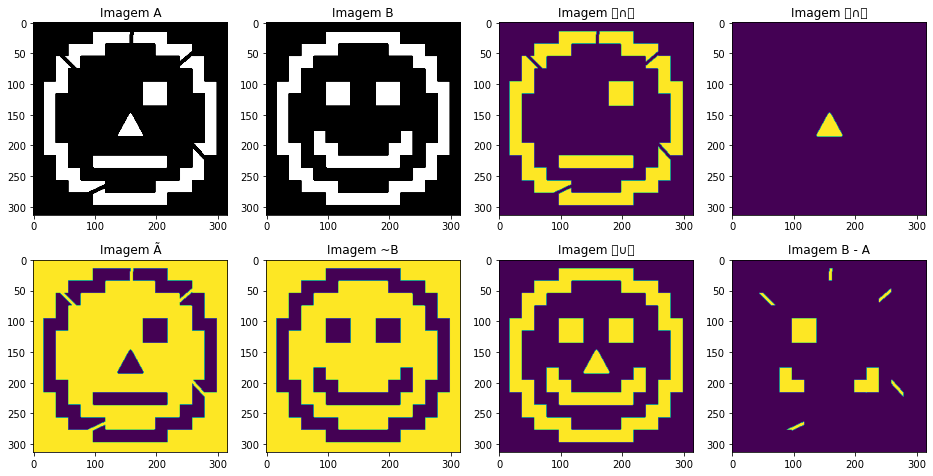

In [27]:
fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize = (16, 8))
gmin = 0
gmax = 255
# Imagem A
axs[0][0].imshow(a, vmin = gmin, vmax = gmax, cmap="gray")
axs[0][0].set_title("Imagem A")
# Imagem B
axs[0][1].imshow(b, vmin = gmin, vmax = gmax, cmap="gray")
axs[0][1].set_title("Imagem B")
# Imagem 𝐴∩𝐵
axs[0][2].imshow(cv2.bitwise_and(a, b))
axs[0][2].set_title("Imagem 𝐴∩𝐵")
# Imagem 𝐴−𝐵
axs[0][3].imshow(cv2.bitwise_and(a, ~b))
axs[0][3].set_title("Imagem 𝐴∩𝐵")
# Imagem Ã
axs[1][0].imshow(~a)
axs[1][0].set_title("Imagem Ã")
# Imagem ~B
axs[1][1].imshow(~b)
axs[1][1].set_title("Imagem ~B")
# Imagem 𝐴∪𝐵
axs[1][2].imshow(cv2.bitwise_or(a, b))
axs[1][2].set_title("Imagem 𝐴∪𝐵")
# Imagem B - A
axs[1][3].imshow(cv2.bitwise_and(b, ~a))
axs[1][3].set_title("Imagem B - A")

**b. O código abaixo aplica uma das máscaras binárias da questão anterior sobre uma imagem. Com relação à imagem resultante, responda:**
 * Qual o efeito de aplicar uma máscara binária sobre uma imagem?

Realizar transformações sobre uma imagem de modo que a imagem resultante depende da operação realizada durante a transformação, apartir disto, podemos obter informações em comum entre as duas entradas da operação. 
 
 * Cite pelo menos duas possíveis aplicações dessa operação. Qual o papel das máscaras nessas aplicações?
 
 Extrair elementos de uma imagem, photoshop e edição de imagem, remoção de ruído. As mascaras servem para filtrar dados que necessitamos ou não queremos, no caso de edição de imagem daria para aplicar vários filtros para por exemplo remover um elemento da imagem.
 
 * Tendo em vista a quantidade de tons de cinza na máscara, qual a importância do tipo de interpolação utilizado?
 
 Obter novos dados apartir de dados que estavam presentes na imagem original
 

(600, 608)
(600, 608)


Text(0.5, 1.0, 'Imagem Resultante')

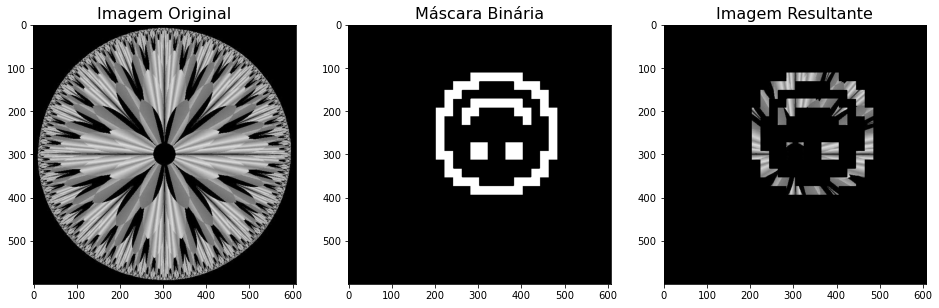

In [97]:
# Imagem Mandala
mandala = cv2.imread( os.path.join(".", "images", "mandala.jpg"), 0 )
H, W = mandala.shape

# Imagem B
B = cv2.imread( os.path.join(".", "images", "B.tif"), 0 )
_, B = cv2.threshold(B, 127, 255, cv2.THRESH_BINARY)
B_resized = cv2.resize(B, (W, H), interpolation = cv2.INTER_NEAREST)

r, c = B_resized.shape
M = cv2.getRotationMatrix2D( (r/2, c/2),  -180, 1)
N = np.array([ [1, 0, -100], [0, 1, -r/3] ])
B_resized = cv2.warpAffine(B, M, (c, r))
B_resized = cv2.warpAffine(B_resized, N, (c, r))

print(B_resized.shape)
print(mandala.shape)

# Imagem D
combined = cv2.bitwise_and( mandala, B_resized )

# Plotagem
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(16, 8))

# Primeira Subfigura da Primeira Linha
axs[0].imshow(mandala, vmin=0, vmax=255, cmap="gray")
axs[0].set_title("Imagem Original", fontsize = 16)

# Segunda Subfigura da Primeira Linha
axs[1].imshow(B_resized, vmin=0, vmax=255, cmap="gray")
axs[1].set_title("Máscara Binária", fontsize = 16)

# Terceira Subfigura da Primeira Linha
axs[2].imshow(combined, vmin=0, vmax=255, cmap="gray")
axs[2].set_title("Imagem Resultante", fontsize = 16)

## 2. Transformações Lineares

Também é possível realizar transformações lineares como rotação e translação com o OpenCV. Para isso, faz-se uso da função **warpAffine**.

**dst_img = cv2.warpAffine(src_img, M, (cols, rows))**

Descrição:  
* **dst_img** representa a imagem de saída;
* **src_img** representa a imagem de entrada;
* **M** corresponde à matriz de transformação utilizada;
* **rows** corresponde ao número de linhas da imagem;
* **cols** corresponde ao número de colunas da imagem;

Alguns exemplos de transformações que podem ser produzidas a partir desta função são:

1. Translações:
    * Para transladar a imagem Tx pixels para a direita e Ty pixels para baixo, faz-se uso de uma matriz com forma: 
    * **M = [ [1, 0, Tx], [0, 1, Ty] ]**
2. Rotações:
    * A matriz de transformação para uma rotacão de $\theta$ graus com relação ao ponto (Px, Py) pode ser obtida utilizando a função **getRotationMatrix2D**: 
    * **M = cv2.getRotationMatrix2D( (Px, Py), $\theta$, scale)**
3. Reflexão:
    * A imagem pode ser refletida utilizando as seguintes matrizes: 
    * **M = [ [-1, 0, cols-1], [0, 1, 0] ]**
    * **M = [ [1, 0, 0], [0, -1, rows-1] ]**

**a. O código abaixo implementa algumas das transformações descritas. Comente todas as linhas desse código e explique o que o programa faz.**
 * Que transformações são implementadas pelas matrizes Ma, Mb, Mc e Md?
 
 Ma -> translocação
 Mb -> rotação
 Mc -> Reflexão em x
 Md -> Reflexão em y
 * As imagens 2 e 4 são diferentes apesar de terem sofrido as mesmas transformações. Por que isso aconteceu?
 
 Os parametros de linhas e colunas da imagem 2 estão distintos na imagem 4, a matrix transformação é a mesma porém o contexto aplicado é diferente.

Text(0.5, 1.0, 'Imagem 6')

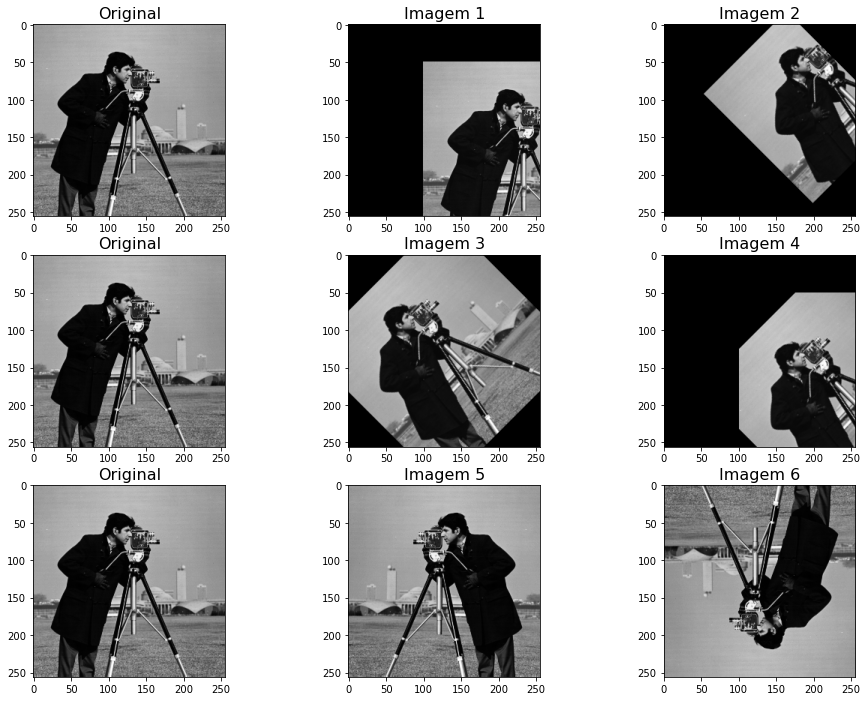

In [98]:
Tx    = 100
Ty    =  50
theta =  45

src_img = cv2.imread( os.path.join(".", "images", "cameraman.jpg"), 0 )
rows, cols = src_img.shape

Ma = np.array( [ [1, 0, Tx], [0, 1, Ty] ], dtype=np.float32 )
Mb = cv2.getRotationMatrix2D( (cols/2, rows/2),  theta , 1)
Mc = np.array( [[-1, 0, cols-1], [0, 1, 0]], dtype = np.float32 )
Md = np.array( [[1, 0, 0], [0, -1, rows-1]], dtype = np.float32 )

# Plots
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize=(16, 12))

# Primeira Subfigura da primeira linha
axs[0][0].imshow(src_img, cmap="gray")  
axs[0][0].set_title("Original", fontsize = 16)

# Segunda Subfigura da primeira linha
dst_img = cv2.warpAffine(src_img, Ma, (cols, rows))
axs[0][1].imshow(dst_img, cmap="gray")
axs[0][1].set_title("Imagem 1", fontsize = 16)

# Terceira Subfigura da primeira linha
dst_img = cv2.warpAffine(dst_img, Mb, (cols, rows))
axs[0][2].imshow(dst_img, cmap="gray")
axs[0][2].set_title("Imagem 2", fontsize = 16)

# Primeira Subfigura da segunda linha
axs[1][0].imshow(src_img, cmap="gray")
axs[1][0].set_title("Original", fontsize = 16)

# Segunda Subfigura da segunda linha
dst_img = cv2.warpAffine(src_img, Mb, (cols, rows))
axs[1][1].imshow(dst_img, cmap="gray")
axs[1][1].set_title("Imagem 3", fontsize = 16)

# Terceira Subfigura da segunda linha
dst_img = cv2.warpAffine(dst_img, Ma, (cols, rows)) #Invertido em relação a imagem 2
axs[1][2].imshow(dst_img, cmap="gray")
axs[1][2].set_title("Imagem 4", fontsize = 16)

# Primeira Subfigura da terceira linha
axs[2][0].imshow(src_img, cmap="gray")
axs[2][0].set_title("Original", fontsize = 16)

# Segunda Subfigura da terceira linha
dst_img = cv2.warpAffine(src_img, Mc, (cols, rows))
axs[2][1].imshow(dst_img, cmap="gray")
axs[2][1].set_title("Imagem 5", fontsize = 16)

# Terceira Subfigura da terceira linha
dst_img = cv2.warpAffine(dst_img, Md, (cols, rows))
axs[2][2].imshow(dst_img, cmap="gray")
axs[2][2].set_title("Imagem 6", fontsize = 16)

**b. Abra a imagem Seta.tif, realize operações abaixo e comente os resultados obtidos.**
 * Translação de -50 pixels na horizontal e   0 pixels na vertical.
 * Translação de 125 pixels na horizontal e -75 pixels na vertical.
 * Reflexão horizontal.
 * Reflexão vertical.
 * Rotação de -25° com relação ao ponto (x =  59, y =  78) e escala   1.
 * Rotação de  25° com relação ao ponto (x = 118, y = 118) e escala   3.
 * Rotação de  25° com relação ao ponto (x = 118, y = 118) e escala 1/3.
 * Rotação de   0° com relação ao ponto (x =  59, y =  59) e escala 1/4.

Text(0.5, 1.0, 'Imagem 5')

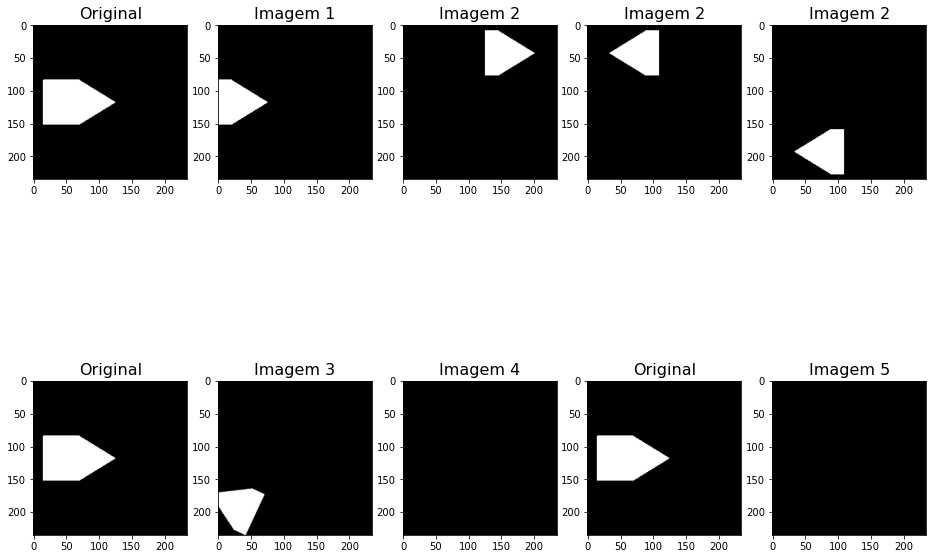

In [102]:
src_img = cv2.imread( os.path.join(".", "images", "Seta.tif"), 0 )
rows, cols = src_img.shape

# Plots
fig, axs = plt.subplots(nrows = 2, ncols = 5, figsize=(16, 12))

# Primeira Subfigura da primeira linha
axs[0][0].imshow(src_img, cmap="gray")  
axs[0][0].set_title("Original", fontsize = 16)

# Segunda Subfigura da primeira linha
Ma = np.array( [ [1, 0, -50], [0, 1, 0] ], dtype=np.float32 )
dst_img = cv2.warpAffine(src_img, Ma, (cols, rows))
axs[0][1].imshow(dst_img, cmap="gray")
axs[0][1].set_title("Imagem 1", fontsize = 16)

# Terceira Subfigura da primeira linha
Ma = np.array( [ [1, 0, 125], [0, 1, -75] ], dtype=np.float32 )
dst_img = cv2.warpAffine(dst_img, Ma, (cols, rows))
axs[0][2].imshow(dst_img, cmap="gray")
axs[0][2].set_title("Imagem 2", fontsize = 16)
 
# [ [-1, 0, cols-1], [0, 1, 0] ]
Ma = np.array( [ [-1, 0, cols-1], [0, 1, 0] ], dtype=np.float32 )
dst_img = cv2.warpAffine(dst_img, Ma, (cols, rows))
axs[0][3].imshow(dst_img, cmap="gray")
axs[0][3].set_title("Imagem 2", fontsize = 16)

# [ [1, 0, 0], [0, -1, rows-1] ]
Ma = np.array( [ [1, 0, 0], [0, -1, rows] ], dtype=np.float32 )
dst_img = cv2.warpAffine(dst_img, Ma, (cols, rows))
axs[0][4].imshow(dst_img, cmap="gray")
axs[0][4].set_title("Imagem 2", fontsize = 16)


# Primeira Subfigura da segunda linha
axs[1][0].imshow(src_img, cmap="gray")
axs[1][0].set_title("Original", fontsize = 16)

# Segunda Subfigura da segunda linha

Ma = cv2.getRotationMatrix2D( (59, 78),  -25 , 1)
dst_img = cv2.warpAffine(dst_img, Ma, (cols, rows))
axs[1][1].imshow(dst_img, cmap="gray")
axs[1][1].set_title("Imagem 3", fontsize = 16)

# Terceira Subfigura da segunda linha
Ma = cv2.getRotationMatrix2D( (118, 118),  25 , 3)
dst_img = cv2.warpAffine(dst_img, Ma, (cols, rows))
axs[1][2].imshow(dst_img, cmap="gray")
axs[1][2].set_title("Imagem 4", fontsize = 16)

# Primeira Subfigura da terceira linha
Ma = cv2.getRotationMatrix2D( (118, 118),  25 , 1/3)
dst_img = cv2.warpAffine(dst_img, Ma, (cols, rows))
axs[1][3].imshow(src_img, cmap="gray")
axs[1][3].set_title("Original", fontsize = 16)

# Segunda Subfigura da terceira linha
Ma = cv2.getRotationMatrix2D( (59, 59),  0 , 1/4)
dst_img = cv2.warpAffine(dst_img, Ma, (cols, rows))
axs[1][4].imshow(dst_img, cmap="gray")
axs[1][4].set_title("Imagem 5", fontsize = 16)


## 3. Dilatação e Erosão

A partir de um elemento estruturante é possível utilizar funções do OpenCV para realizar as transformações morfológicas de erosão (1) e dilatação (2). A sintaxe das funções é: 

 1. **dst_img = cv2.erode( src_img, kernel, iterations = 1 )**    
 2. **dst_img = cv2.dilate( src_img, kernel, iterations = 1 )**    

Descrição:
* **dst_img** representa a imagem de saída;
* **src_img** representa a imagem de entrada;
* **kernel** representa o elemento estruturante;
* **iterations** corresponde ao número de vezes que a operação deve ser repetida.

Elementos estruturantes podem ser produzidos a partir de arrays do numpy.

**a. Carregue a imagem 'text.tif' e utilize o elemento estruturante abaixo para produzir uma versão dilatada da imagem e outra versão erodida. Comente os resultados encontrados.**
 * **kernel = np.array( [ [1, 0, 1], [0, 1, 0], [1, 0, 1] ], dtype = np.uint8 )**

Text(0.5, 1.0, 'Imagem com Dilate')

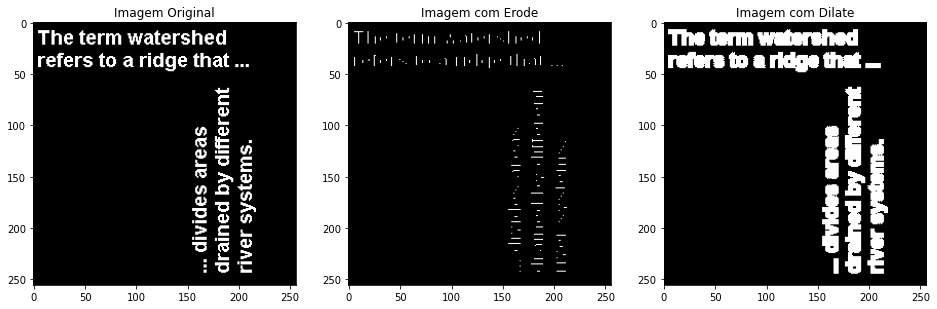

In [128]:
src_img = cv2.imread( os.path.join(".", "images", "text.tif"), 0 )
rows, cols = src_img.shape
kernel = np.array( [ [1, 0, 1], [0, 1, 0], [1, 0, 1] ], dtype = np.uint8 )

# Plots
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(16, 12))

axs[0].imshow(src_img, cmap='gray')
axs[0].set_title("Imagem Original")

dst_img = cv2.erode(src_img, kernel, iterations = 1)
axs[1].imshow(dst_img, cmap='gray')
axs[1].set_title("Imagem com Erode")

dst_img = cv2.dilate(src_img, kernel, iterations = 1)
axs[2].imshow(dst_img, cmap='gray')
axs[2].set_title("Imagem com Dilate")

Elementos estruturantes também podem ser produzidos pela função **getStructuringElement** do OpenCV:

 * **kernel = cv2.getStructuringElement( FLAG, (W,H) )**

Descrição:
* **kernel** representa o elemento estruturante;
* **(W, H)** é uma tupla com as dimensões do elemento estruturante;
* **FLAG** é um parâmetro que indica o tipo de elemento estruturante produzido, pode ser:
    * **cv2.MORPH_RECT** produz um elemento retangular;
    * **cv2.MORPH_ELLIPSE** produz um elemento elíptico;
    * **cv2.MORPH_CROSS** produz um elemento em forma de cruz;

Text(0.5, 1.0, 'cv2.MORPH_CROSS')

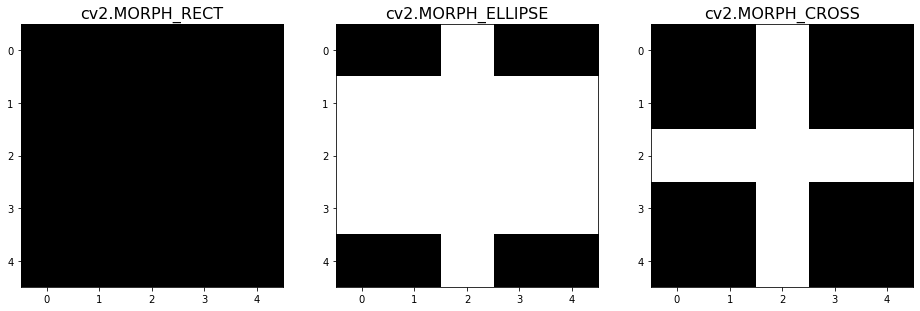

In [108]:
H = 5
W = 5

# Plots
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(16, 12))

# Primeira Subfigura da primeira linha
kernel = cv2.getStructuringElement( cv2.MORPH_RECT, (W,H) )
axs[0].imshow(kernel, cmap="gray")
axs[0].set_title("cv2.MORPH_RECT", fontsize = 16)

# Segunda Subfigura da primeira linha
kernel = cv2.getStructuringElement( cv2.MORPH_ELLIPSE, (W,H) )
axs[1].imshow(kernel, cmap="gray")
axs[1].set_title("cv2.MORPH_ELLIPSE", fontsize = 16)

# Terceira Subfigura da primeira linha
kernel = cv2.getStructuringElement( cv2.MORPH_CROSS, (W,H) )
axs[2].imshow(kernel, cmap="gray")
axs[2].set_title("cv2.MORPH_CROSS", fontsize = 16)

Ou ainda utilizando as funções do Scikit-Image:

 * **kernel = skimage.morphology.square( H )**
 * **kernel = skimage.morphology.rectangle( H, W )**
 * **kernel = skimage.morphology.diamond( H )**
 * **kernel = skimage.morphology.disk( R )**
 * **kernel = skimage.morphology.octagon( M, N )**
 * **kernel = skimage.morphology.star( A)**

Text(0.5, 1.0, 'Star')

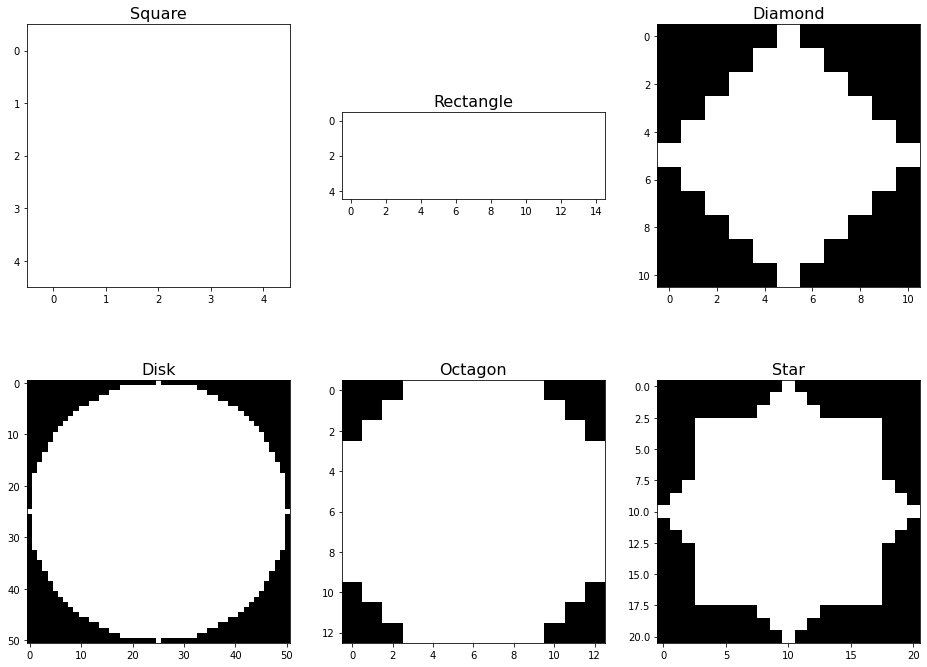

In [109]:
H =  5 # Altura do quadrado/retângulo e lado do diamante
W = 15 # Largura do retângulo
R = 25 # Raio do disco
M =  7 # Comprimento dos lados retos do octágono
N =  3 # Comprimento dos lados inclinados do octágono
A =  7 # Variável que controla o tamanho da estrela, o quadrado que a contém tem lado H = 2*a + 1 + 2*floor(a / 2)

# Plots
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(16, 12))

# Primeira Subfigura da primeira linha
kernel = skimage.morphology.square( H )
axs[0][0].imshow(kernel, vmin=0, vmax=1, cmap="gray")
axs[0][0].set_title("Square", fontsize = 16)

# Segunda Subfigura da primeira linha
kernel = skimage.morphology.rectangle( H, W )
axs[0][1].imshow(kernel, vmin=0, vmax=1, cmap="gray")
axs[0][1].set_title("Rectangle", fontsize = 16)

# Terceira Subfigura da primeira linha
kernel = skimage.morphology.diamond( H )
axs[0][2].imshow(kernel, vmin=0, vmax=1, cmap="gray")
axs[0][2].set_title("Diamond", fontsize = 16)

# Primeira Subfigura da segunda linha
kernel = skimage.morphology.disk( R )
axs[1][0].imshow(kernel, vmin=0, vmax=1, cmap="gray")
axs[1][0].set_title("Disk", fontsize = 16)

# Segunda Subfigura da segunda linha
kernel = skimage.morphology.octagon( M, N )
axs[1][1].imshow(kernel, vmin=0, vmax=1, cmap="gray")
axs[1][1].set_title("Octagon", fontsize = 16)

# Terceira Subfigura da segunda linha
kernel = skimage.morphology.star( A )
axs[1][2].imshow(kernel, vmin=0, vmax=1, cmap="gray")
axs[1][2].set_title("Star", fontsize = 16)

Text(0.5, 1.0, 'Linha Vertical de 5 pontos')

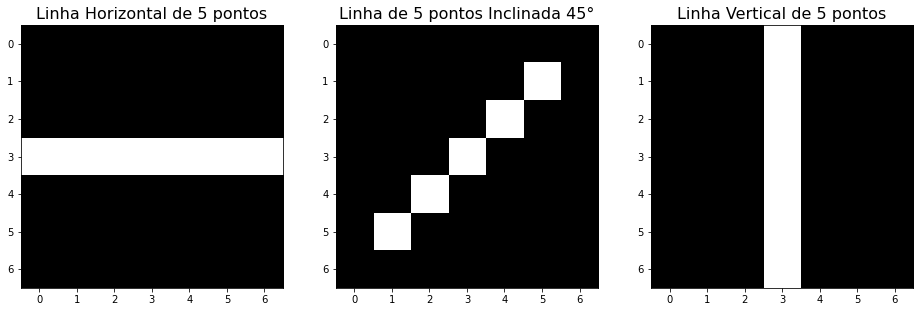

In [110]:
# Elemento estruturante correspondente a uma linha horizontal
orig_kernel  = np.zeros( (7, 7), dtype = np.uint8 )
orig_kernel[3, :] = 1

# Matriz de rotação para 45°
M = cv2.getRotationMatrix2D( (3, 3),  45 ,   1)

# Plots
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(16, 12))

# Primeira Subfigura da primeira linha
axs[0].imshow(orig_kernel, cmap="gray")
axs[0].set_title("Linha Horizontal de 5 pontos", fontsize = 16)

# Segunda Subfigura da primeira linha
kernel = cv2.warpAffine(orig_kernel, M, (7, 7))
axs[1].imshow(kernel, cmap="gray")
axs[1].set_title("Linha de 5 pontos Inclinada 45°", fontsize = 16)

# Terceira Subfigura da primeira linha
kernel = cv2.warpAffine(kernel, M, (7, 7))
axs[2].imshow(kernel, cmap="gray")
axs[2].set_title("Linha Vertical de 5 pontos", fontsize = 16)

**b. Usando as funções mostradas, gere os seguintes elementos estruturantes para dilatar a imagem 'text.tif'. Mostre as imagens resultantes e comente os resultados encontrados.**
 * Disco de raio 9;
 * Estrela com A = 13;
 * Linha vertical de 11 pontos de tamanho;
 * Linha vertical de 9 pontos de tamanho;

Text(0.5, 1.0, 'Imagem 4')

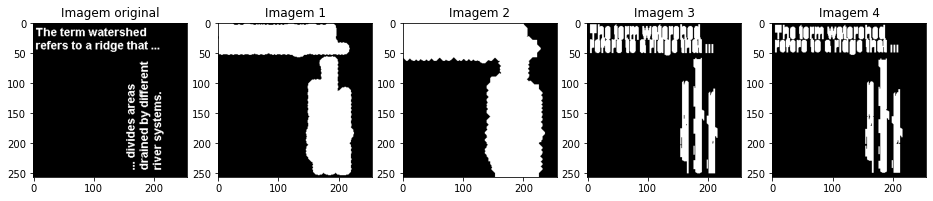

In [129]:
src_img = cv2.imread( os.path.join(".", "images", "text.tif"), 0 )
fig, axs = plt.subplots(nrows = 1, ncols = 5, figsize=(16, 12))

axs[0].imshow(src_img, cmap='gray')
axs[0].set_title('Imagem original')

# Disco de raio 9
kernel = skimage.morphology.disk( 9 )
dst_img = cv2.dilate(src_img, kernel, iterations = 1)
axs[1].imshow(dst_img, cmap='gray')
axs[1].set_title("Imagem 1")

# Estrela com A = 13
kernel = skimage.morphology.star( 13 )
dst_img = cv2.dilate(src_img, kernel, iterations = 1)
axs[2].imshow(dst_img, cmap='gray')
axs[2].set_title("Imagem 2")



# linha vertial de 11 pontos
M = cv2.getRotationMatrix2D( (6, 6),  90 ,   1)
orig_kernel  = np.zeros( (13, 13), dtype = np.uint8 )
orig_kernel[6, :] = 1
kernel = cv2.warpAffine(orig_kernel, M, (13, 13))
dst_img = cv2.dilate(src_img, kernel, iterations = 1)
axs[3].imshow(dst_img, cmap='gray')
axs[3].set_title("Imagem 3")

# plot linha
#M = cv2.getRotationMatrix2D( (6, 6),  45,   1)
#kernel = cv2.warpAffine(orig_kernel, M, (13, 13))
#axs[4].imshow(kernel, cmap='gray')
#axs[4].set_title('Linha de 11 pontos 45º')

# linha vertical de 9 pontos
M = cv2.getRotationMatrix2D( (5, 5),  90 ,   1)
orig_kernel  = np.zeros( (11, 11), dtype = np.uint8 )
orig_kernel[5, :] = 1
kernel = cv2.warpAffine(orig_kernel, M, (11, 11))
dst_img = cv2.dilate(src_img, kernel, iterations = 1)
axs[4].imshow(dst_img, cmap='gray')
axs[4].set_title("Imagem 4")

# Os pixels foram dilatados de acordo com a geometria de cada eleemnto estruturante tal que, as melhores dilatações ficaram
# entre as imagens 3 e 4, que por sua vez a 4(linha de 9pontos) consegue dilatar melhor os pixels dos textos 
# que estão escritos na horizontal

**c. Realize a erosão na imagem 'wirebond_mask.tif' com um elemento estruturante formado por um diamante de raio 6. Varie o tamanho (raio) do elemento estruturante para 4 e 8 e mostre os resultados. Comente os resultados encontrados.**

Text(0.5, 1.0, 'Kernel r = 8')

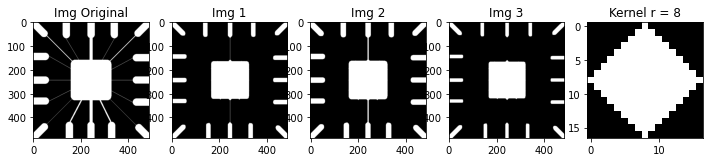

In [135]:
src_img = cv2.imread( os.path.join(".", "images", "wirebond_mask.tif"), 0 )
rows, cols = src_img.shape

fig, axs = plt.subplots(nrows = 1, ncols = 5, figsize = (12, 8))

axs[0].imshow(src_img, cmap='gray')
axs[0].set_title('Img Original')

kernel = skimage.morphology.diamond(6)
dst_img = cv2.erode(src_img, kernel, iterations=1)
axs[1].imshow(dst_img, cmap='gray')
axs[1].set_title('Img 1')

kernel = skimage.morphology.diamond(4)
dst_img = cv2.erode(src_img, kernel, iterations=1)
axs[2].imshow(dst_img, cmap='gray')
axs[2].set_title('Img 2')

kernel = skimage.morphology.diamond(8)
dst_img = cv2.erode(src_img, kernel, iterations=1)
axs[3].imshow(dst_img, cmap='gray')
axs[3].set_title('Img 3')


axs[4].imshow(kernel, cmap='gray')
axs[4].set_title('Kernel r = 8')

# quanto maior o raio do elemento diamante, mais pixels são erodidos durante a transformação
# os elementos menos densos acabam sendo 'perdidos'

## 4. Abertura e Fechamento

A partir de um elemento estruturante é possível utilizar funções do OpenCV para realizar as transformações morfológicas de abertura e fechamento a partir de uma mesma função. Sua sintaxe é: 

 * **dst_img = cv2.morphologyEx(src_img, FLAG, kernel)**       

Descrição:
* **dst_img** representa a imagem de saída;
* **src_img** representa a imagem de entrada;
* **kernel** representa o elemento estruturante;
* **FLAG** é um parâmetro que indica a transformação realizada, pode ser:
    * **cv2.MORPH_OPEN** realiza uma operação de abertura;
    * **cv2.MORPH_CLOSE** realiza uma operação de fechamento;
    * **cv2.MORPH_GRADIENT** realiza uma operação de gradiente morfológico (diferença entre as versões dilatada e erodida de uma imagem);
    * **cv2.MORPH_TOPHAT** realiza uma operação de Tophat (diferença entre a imagem original e sua versão após abertura);
    * **cv2.MORPH_BLACKHAT** realiza uma operação de Blackhat (diferença entre a versão da imagem após fechamento e a original);

**a. Aplicar os seguintes filtros morfológicos na imagem 'shapes.tif':**
 * Abertura, utilizando um elemento estruturante quadrado (square) de altura 10.
 * Fechamento, utilizando um elemento estruturante quadrado de altura 10.
 * Uma abertura seguida de um fechamento, um elemento estruturante quadrado de altura 10.
 * Repetir o item anterior variando a altura do elemento estruturante para 5 e depois para 15. Analise os resultados encontrados.

**Comente os resultados encontrados em todos os itens acima.**

Text(0.5, 1.0, 'Img 5')

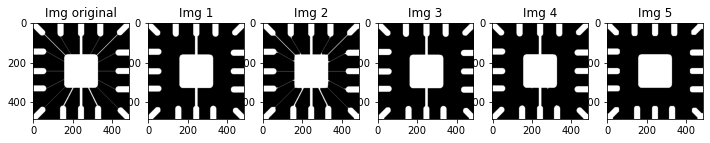

In [148]:
src_img = cv2.imread( os.path.join(".", "images", "wirebond_mask.tif"), 0 )
rows, cols = src_img.shape

fig, axs = plt.subplots(nrows = 1, ncols = 6, figsize = (12, 8))


# dst_img = cv2.morphologyEx(src_img, FLAG, kernel)

#img origin
axs[0].imshow(src_img, cmap = 'gray')
axs[0].set_title('Img original')


#aberto
kernel = skimage.morphology.square(10)
dst = cv2.morphologyEx(src_img, cv2.MORPH_OPEN, kernel)

axs[1].imshow(dst, cmap = 'gray')
axs[1].set_title('Img 1')

#fechado
kernel = skimage.morphology.square(10)
dst = cv2.morphologyEx(src_img, cv2.MORPH_CLOSE, kernel)

axs[2].imshow(dst, cmap = 'gray')
axs[2].set_title('Img 2')

#ambos

kernel = skimage.morphology.square(10)
dst = cv2.morphologyEx(src_img, cv2.MORPH_OPEN, kernel)
dst = cv2.morphologyEx(dst, cv2.MORPH_CLOSE, kernel)

axs[3].imshow(dst, cmap = 'gray')
axs[3].set_title('Img 3')


# ambos e raio = 5

kernel = skimage.morphology.square(5)
dst = cv2.morphologyEx(src_img, cv2.MORPH_OPEN, kernel)
dst = cv2.morphologyEx(dst, cv2.MORPH_CLOSE, kernel)

axs[4].imshow(dst, cmap = 'gray')
axs[4].set_title('Img 4')
# filtrou os elementos ao redor do quadrado com bordas no centro da imagem,
# mas ainda deixou traços e saliências, as bordas do elemento do centro ficou com um aspecto de um glaussian bluer


# amobos e raio = 15
kernel = skimage.morphology.square(15)
dst = cv2.morphologyEx(src_img, cv2.MORPH_OPEN, kernel)
dst = cv2.morphologyEx(dst, cv2.MORPH_CLOSE, kernel)

axs[5].imshow(dst, cmap = 'gray')
axs[5].set_title('Img 5')
# flitrou perfeitamente os elementos ao redor do quadrado com bordas no centro da imagem
# as bordas do elemento do centro ficou com um aspecto de um glaussian blur mais forte que o anterior


**a. Aplique os seguintes filtros morfológicos na imagem 'finger.jpg':**
 * Abertura, utilizando um elemento estruturante em formato de disco de raio 1.
 * Fechamento, utilizando um elemento estruturante em formato de disco de raio 1.
 * Uma abertura seguida de um fechamento com um elemento estruturante em formato de disco de raio 1.
 * Um fechamento seguido de uma abertura com um elemento estruturante em formato de disco de raio 1.
 
**Comente os resultados encontrados em todos os itens acima.**

Text(240, 30, 'ruído')

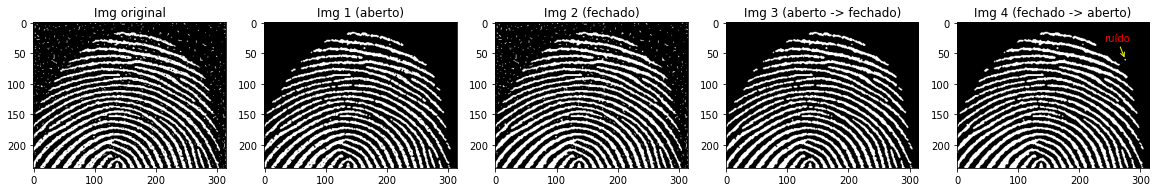

In [179]:
src_img = cv2.imread( os.path.join(".", "images", "finger.jpg"), 0 )
rows, cols = src_img.shape

fig, axs = plt.subplots(nrows = 1, ncols = 5, figsize = (20, 12))


# dst_img = cv2.morphologyEx(src_img, FLAG, kernel)

#img origin
axs[0].imshow(src_img, cmap = 'gray')
axs[0].set_title('Img original')


#aberto
kernel = skimage.morphology.disk(1)
dst = cv2.morphologyEx(src_img, cv2.MORPH_OPEN, kernel)

axs[1].imshow(dst, cmap = 'gray')
axs[1].set_title('Img 1 (aberto)')
# os ruídos no fundo(fora da area de interesse que é a digital) foram filtrados


#fechado
kernel = skimage.morphology.disk(1)
dst = cv2.morphologyEx(src_img, cv2.MORPH_CLOSE, kernel)

axs[2].imshow(dst, cmap = 'gray')
axs[2].set_title('Img 2 (fechado)')
# nenhuma mudança significativa em relação a original


# abertura -> fechamento

kernel = skimage.morphology.disk(1)
dst = cv2.morphologyEx(src_img, cv2.MORPH_OPEN, kernel)
dst = cv2.morphologyEx(dst, cv2.MORPH_CLOSE, kernel)

axs[3].imshow(dst, cmap = 'gray')
axs[3].set_title('Img 3 (aberto -> fechado)')
# nenhuma mudança significativa em relação a img 1


# fechamento -> abertura

kernel = skimage.morphology.disk(1)
dst = cv2.morphologyEx(src_img, cv2.MORPH_CLOSE, kernel)
dst = cv2.morphologyEx(dst, cv2.MORPH_OPEN, kernel)

axs[4].imshow(dst, cmap = 'gray')
axs[4].set_title('Img 4 (fechado -> aberto)')
axs[4].annotate("ruído", xy=(275, 60), xytext=(240, 30), arrowprops=dict(arrowstyle="->", color='yellow'), color = 'red')
# um pouco de ruído ainda ficou na img 4 (comparar com a img 3)

